# Prepare the Dog/Cat dataset ready for training

Author: Anh Trung Tra    
Email: tratrunganh001@gmail.com

**Environment**:
- Ubuntu 16.04
- Python3.5
- TensorFlow 2.0

**Ref**:
https://www.tensorflow.org/alpha/tutorials/load_data/images

**TODO:**  
[X] Download the dataset and unzip   
[X] Split dataset into train/val/test   
[X] Creat tfrecord files from the dataset: train/val/test  
[X] Build the dataset pipeline using tf.data

In [1]:
import os
import glob
import random
import shutil

import tensorflow as tf
from zipfile import ZipFile
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

## Download the dataset and unzip
Note: download the dataset at: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765 and copy to the directory.

In [2]:
if os.path.isfile('kagglecatsanddogs_3367a.zip') == False:
    print("You should download the dataset first at: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765")
if os.path.isdir('PetImages') == False:
    print("Unzip the dataset")
    zip_ref = ZipFile('kagglecatsanddogs_3367a.zip', 'r')
    zip_ref.extractall('data/')
    zip_ref.close()
!tree data/PetImages/ -L 2

Unzip the dataset
data/PetImages/
├── Cat
│   ├── 0.jpg
│   ├── 10000.jpg
│   ├── 10001.jpg
│   ├── 10002.jpg
│   ├── 10003.jpg
│   ├── 10004.jpg
│   ├── 10005.jpg
│   ├── 10006.jpg
│   ├── 10007.jpg
│   ├── 10008.jpg
│   ├── 10009.jpg
│   ├── 1000.jpg
│   ├── 10010.jpg
│   ├── 10011.jpg
│   ├── 10012.jpg
│   ├── 10013.jpg
│   ├── 10014.jpg
│   ├── 10015.jpg
│   ├── 10016.jpg
│   ├── 10017.jpg
│   ├── 10018.jpg
│   ├── 10019.jpg
│   ├── 1001.jpg
│   ├── 10020.jpg
│   ├── 10021.jpg
│   ├── 10022.jpg
│   ├── 10023.jpg
│   ├── 10024.jpg
│   ├── 10025.jpg
│   ├── 10026.jpg
│   ├── 10027.jpg
│   ├── 10028.jpg
│   ├── 10029.jpg
│   ├── 1002.jpg
│   ├── 10030.jpg
│   ├── 10031.jpg
│   ├── 10032.jpg
│   ├── 10033.jpg
│   ├── 10034.jpg
│   ├── 10035.jpg
│   ├── 10036.jpg
│   ├── 10037.jpg
│   ├── 10038.jpg
│   ├── 10039.jpg
│   ├── 1003.jpg
│   ├── 10040.jpg
│   ├── 10041.jpg
│   ├── 10042.jpg
│   ├── 10043.jpg
│   ├── 10044.jpg
│   ├── 10045.jpg
│   ├── 10046.jpg
│   ├── 10047.jpg
│   ├── 1004

���   ├── 12387.jpg
│   ├── 12388.jpg
│   ├── 12389.jpg
│   ├── 1238.jpg
│   ├── 12390.jpg
│   ├── 12391.jpg
│   ├── 12392.jpg
│   ├── 12393.jpg
│   ├── 12394.jpg
│   ├── 12395.jpg
│   ├── 12396.jpg
│   ├── 12397.jpg
│   ├── 12398.jpg
│   ├── 12399.jpg
│   ├── 1239.jpg
│   ├── 123.jpg
│   ├── 12400.jpg
│   ├── 12401.jpg
│   ├── 12402.jpg
│   ├── 12403.jpg
│   ├── 12404.jpg
│   ├── 12405.jpg
│   ├── 12406.jpg
│   ├── 12407.jpg
│   ├── 12408.jpg
│   ├── 12409.jpg
│   ├── 1240.jpg
│   ├── 12410.jpg
│   ├── 12411.jpg
│   ├── 12412.jpg
│   ├── 12413.jpg
│   ├── 12414.jpg
│   ├── 12415.jpg
│   ├── 12416.jpg
│   ├── 12417.jpg
│   ├── 12418.jpg
│   ├── 12419.jpg
│   ├── 1241.jpg
│   ├── 12420.jpg
│   ├── 12421.jpg
│   ├── 12422.jpg
│   ├── 12423.jpg
│   ├── 12424.jpg
│   ├── 12425.jpg
│   ├── 12426.jpg
│   ├── 12427.jpg
│   ├── 12428.jpg
│   ├── 12429.jpg
│   ├── 1242.jpg
│   ├── 12430.jpg
│   ├── 12431.jpg
│   ├── 12432.jpg
│   ├── 12433.jpg
│   ├── 12434.jpg
│   ├── 12435.jpg
│   ├── 12436.j

│   ├─��� 6002.jpg
│   ├── 6003.jpg
│   ├── 6004.jpg
│   ├── 6005.jpg
│   ├── 6006.jpg
│   ├── 6007.jpg
│   ├── 6008.jpg
│   ├── 6009.jpg
│   ├── 600.jpg
│   ├── 6010.jpg
│   ├── 6011.jpg
│   ├── 6012.jpg
│   ├── 6013.jpg
│   ├── 6014.jpg
│   ├── 6015.jpg
│   ├── 6016.jpg
│   ├── 6017.jpg
│   ├── 6018.jpg
│   ├── 6019.jpg
│   ├── 601.jpg
│   ├── 6020.jpg
│   ├── 6021.jpg
│   ├── 6022.jpg
│   ├── 6023.jpg
│   ├── 6024.jpg
│   ├── 6025.jpg
│   ├── 6026.jpg
│   ├── 6027.jpg
│   ├── 6028.jpg
│   ├── 6029.jpg
│   ├── 602.jpg
│   ├── 6030.jpg
│   ├── 6031.jpg
│   ├── 6032.jpg
│   ├── 6033.jpg
│   ├── 6034.jpg
│   ├── 6035.jpg
│   ├── 6036.jpg
│   ├── 6037.jpg
│   ├── 6038.jpg
│   ├── 6039.jpg
│   ├── 603.jpg
│   ├── 6040.jpg
│   ├── 6041.jpg
│   ├── 6042.jpg
│   ├── 6043.jpg
│   ├── 6044.jpg
│   ├── 6045.jpg
│   ├── 6046.jpg
│   ├── 6047.jpg
│   ├── 6048.jpg
│   ├── 6049.jpg
│   ├── 604.jpg
│   ├── 6050.jpg
│   ├── 6051.jpg
│   ├── 6052.jpg
│   ├── 6053.jpg
│   ├── 6054.jpg
│   ├── 6055.jpg


└── Dog
    ├── 0.jpg
    ├── 10000.jpg
    ├── 10001.jpg
    ├── 10002.jpg
    ├── 10003.jpg
    ├── 10004.jpg
    ├── 10005.jpg
    ├── 10006.jpg
    ├── 10007.jpg
    ├── 10008.jpg
    ├── 10009.jpg
    ├── 1000.jpg
    ├── 10010.jpg
    ├── 10011.jpg
    ├── 10012.jpg
    ├── 10013.jpg
    ├── 10014.jpg
    ├── 10015.jpg
    ├── 10016.jpg
    ├── 10017.jpg
    ├── 10018.jpg
    ├── 10019.jpg
    ├── 1001.jpg
    ├── 10020.jpg
    ├── 10021.jpg
    ├── 10022.jpg
    ├── 10023.jpg
    ├── 10024.jpg
    ├── 10025.jpg
    ├── 10026.jpg
    ├── 10027.jpg
    ├── 10028.jpg
    ├── 10029.jpg
    ├── 1002.jpg
    ├── 10030.jpg
    ├── 10031.jpg
    ├── 10032.jpg
    ├── 10033.jpg
    ├── 10034.jpg
    ├── 10035.jpg
    ├── 10036.jpg
    ├── 10037.jpg
    ├── 10038.jpg
    ├── 10039.jpg
    ├── 1003.jpg
    ├── 10040.jpg
    ├── 10041.jpg
    ├── 10042.jpg
    ├── 10043.jpg
    ├── 10044.jpg
    ├── 10045.jpg
    ├── 10046.jpg
    ├── 10047.jpg
    ├── 10048.jpg
    ├── 10049.jpg
    ├── 10

    ├── 1322.jpg
    ├── 1323.jpg
    ├── 1324.jpg
    ├── 1325.jpg
    ├── 1326.jpg
    ├── 1327.jpg
    ├── 1328.jpg
    ├── 1329.jpg
    ├── 132.jpg
    ├── 1330.jpg
    ├── 1331.jpg
    ├── 1332.jpg
    ├── 1333.jpg
    ├── 1334.jpg
    ├── 1335.jpg
    ├── 1336.jpg
    ├── 1337.jpg
    ├── 1338.jpg
    ├── 1339.jpg
    ├── 133.jpg
    ├── 1340.jpg
    ├── 1341.jpg
    ├── 1342.jpg
    ├── 1343.jpg
    ├── 1344.jpg
    ├── 1345.jpg
    ├── 1346.jpg
    ├── 1347.jpg
    ├── 1348.jpg
    ├── 1349.jpg
    ├── 134.jpg
    ├── 1350.jpg
    ├── 1351.jpg
    ├── 1352.jpg
    ├── 1353.jpg
    ├── 1354.jpg
    ├── 1355.jpg
    ├── 1356.jpg
    ├── 1357.jpg
    ├── 1358.jpg
    ├── 1359.jpg
    ├── 135.jpg
    ├── 1360.jpg
    ├── 1361.jpg
    ├── 1362.jpg
    ├── 1363.jpg
    ├── 1364.jpg
    ├── 1365.jpg
    ├── 1366.jpg
    ├── 1367.jpg
    ├── 1368.jpg
    ├── 1369.jpg
    ├── 136.jpg
    ├── 1370.jpg
    ├── 1371.jpg
    ├── 1372.jpg
    ├── 1373.jpg
    ├── 1374.jpg
    ├── 1375.jpg
  

    ├── 9048.jpg
    ├── 9049.jpg
    ├── 904.jpg
    ├── 9050.jpg
    ├── 9051.jpg
    ├── 9052.jpg
    ├── 9053.jpg
    ├── 9054.jpg
    ├── 9055.jpg
    ├── 9056.jpg
    ├── 9057.jpg
    ├── 9058.jpg
    ├── 9059.jpg
    ├── 905.jpg
    ├── 9060.jpg
    ├── 9061.jpg
    ├── 9062.jpg
    ├── 9063.jpg
    ├── 9064.jpg
    ├── 9065.jpg
    ├── 9066.jpg
    ├── 9067.jpg
    ├── 9068.jpg
    ├── 9069.jpg
    ├── 906.jpg
    ├── 9070.jpg
    ├── 9071.jpg
    ├── 9072.jpg
    ├── 9073.jpg
    ├── 9074.jpg
    ├── 9075.jpg
    ├── 9076.jpg
    ├── 9077.jpg
    ├── 9078.jpg
    ├── 9079.jpg
    ├── 907.jpg
    ├── 9080.jpg
    ├── 9081.jpg
    ├── 9082.jpg
    ├── 9083.jpg
    ├── 9084.jpg
    ├── 9085.jpg
    ├── 9086.jpg
    ├── 9087.jpg
    ├── 9088.jpg
    ├── 9089.jpg
    ├── 908.jpg
    ├── 9090.jpg
    ├── 9091.jpg
    ├── 9092.jpg
    ├── 9093.jpg
    ├── 9094.jpg
    ├── 9095.jpg
    ├── 9096.jpg
    ├── 9097.jpg
    ├── 9098.jpg
    ├── 9099.jpg
    ├── 909.jpg
    ├── 90.jpg
    ├

## Split the dataset into train/val/test

In [3]:
dataset_dir = 'data/PetImages/'
print('Number of images in total: {}'.format(len(glob.glob(os.path.join(dataset_dir, '*/*.jpg')))))
print('Number of cat images in total: {}'.format(len(glob.glob(os.path.join(dataset_dir, 'Cat/*.jpg')))))
print('Number of dog images in total: {}'.format(len(glob.glob(os.path.join(dataset_dir, 'Dog/*.jpg')))))

image_paths = glob.glob(os.path.join(dataset_dir, '*/*.jpg'))
# split the dataset into train/val/test and store in the directory
random.seed(420)
random.shuffle(image_paths)
dataset = {
    'train': image_paths[:int(0.6*len(image_paths))],
    'val': image_paths[int(0.6*len(image_paths)):int(0.8*len(image_paths))],
    'test': image_paths[int(0.8*len(image_paths)):]
}

Number of images in total: 25000
Number of cat images in total: 12500
Number of dog images in total: 12500


## Build the tfrecord files for the dataset

In [4]:
# Helper functions
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
    image_shape = tf.image.decode_jpeg(image_string).shape

    feature = {
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

def write_tfrecord(filenames, path, prefix='train'):
    """ TODO: Update description."""
    save_path = os.path.join(path, prefix+'.tfrecord')
    with tf.io.TFRecordWriter(save_path) as writer:
        num_image = 0
        for filename in filenames:
            label = 0 if 'Cat' in filename else 1
            image_string = open(filename, 'rb').read()
            try:
                tf_example = image_example(image_string, label)
            except:
                # print('Corrupted image: {}'.format(filename))
                continue
            writer.write(tf_example.SerializeToString())
            num_image += 1
    os.rename(save_path, os.path.join(path, prefix+'_'+str(num_image)+'.tfrecord'))

In [5]:
for key in dataset.keys():
    write_tfrecord(dataset[key], 'data/PetImages/', key)

## Build the dataset pipeline using tf.data

In [6]:
# Create a dictionary describing the features.  
image_feature_description = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_function(example_proto, size, is_augmented=True):
    """ TODO: Update description!
    """
    parsed_example = tf.io.parse_single_example(example_proto, image_feature_description)
    image_string = parsed_example['image_raw']
    label = parsed_example['label']
    
    # Don't use tf.image.decode_image, or the output shape will be undefined
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image_decoded, tf.float32) # convert to float values in [0, 1]
    
    if is_augmented: # augmented here!
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, max_delta=32.0 / 255.0)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.clip_by_value(image, 0.0, 1.0)
        
    # resize image to fit the input size
    resized_image = tf.image.resize_with_pad(image, size, size)

    return resized_image, label

train_dataset = (tf.data.TFRecordDataset('data/PetImages/train_14898.tfrecord')
                     .map(lambda ep: _parse_function(ep, 256, True), num_parallel_calls=4)
                     .shuffle(1000)
                     .batch(64)
                     .prefetch(1)  # make sure you always have one batch ready to serve
                )
for images, labels in train_dataset:
    break

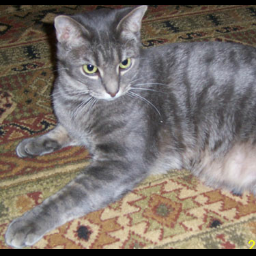

In [7]:
Image.fromarray((255*images.numpy()[1]).astype('uint8'))